# Lead Scoring Case Study

**Problem Statement**:An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Step 1: Reading and Understanding Data

In [336]:
## import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [337]:
# importing the dataset
leads=pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [338]:
## Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [339]:
# let's look at the statistical aspects of the datafram
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [340]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [341]:
## Converting the select values to null
leads=leads.replace("Select",np.nan)

In [342]:
## dropping Prospect ID and Lead Number
leads.drop(['Lead Number','Prospect ID'],axis=1,inplace=True)

## Step2:Data Cleaning

### Missing Value Treatment

In [343]:
## count the missing values in each column
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [344]:
## percentage of missing values
round(leads.isnull().mean()*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [345]:
## dropping the columns with missing values greater than or equal to 40%
leads.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index'
              ,'Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [346]:
## percentage of missing values
round(leads.isnull().mean()*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [347]:
## Imputing City column with the most frequent city
round(leads['City'].value_counts(normalize=True)*100,2)

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64

In [348]:
## 'Mumbai' is occuring most frequently, so imputing missing values with 'Mumbai'
leads['City'].replace(np.nan,'Mumbai',inplace=True)

In [349]:
## Imputing Specialization column 
round(leads['Specialization'].value_counts(normalize=True)*100,2)

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64

In [350]:
## Creating another category "others" and imputing missing values with "Others"
leads["Specialization"].replace(np.nan,"Others",inplace=True)

In [351]:
## Imputing Tags column 
round(leads['Tags'].value_counts(normalize=True)*100,2)

Will revert after reading the email                  35.20
Ringing                                              20.43
Interested in other courses                           8.71
Already a student                                     7.90
Closed by Horizzon                                    6.08
switched off                                          4.08
Busy                                                  3.16
Lost to EINS                                          2.97
Not doing further education                           2.46
Interested  in full time MBA                          1.99
Graduation in progress                                1.89
invalid number                                        1.41
Diploma holder (Not Eligible)                         1.07
wrong number given                                    0.80
opp hangup                                            0.56
number not provided                                   0.46
in touch with EINS                                    0.

In [352]:
## Imputing missing values in Tags columns with the most occuring value "Will revert after reading the email"
leads["Tags"].replace(np.nan,"Will revert after reading the email",inplace=True)

In [353]:
## Imputing Tags column 
round(leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100,2)

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

In [354]:
##Imputing missing values with mode
leads["What matters most to you in choosing a course"].replace(np.nan,"Better Career Prospects",inplace=True)

In [355]:
round(leads['What is your current occupation'].value_counts(normalize=True)*100,2)

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64

In [356]:
##Imputing missing values with "Unemployed"
leads["What is your current occupation"].replace(np.nan,"Unemployed",inplace=True)

In [357]:
round(leads['Country'].value_counts(normalize=True)*100,2)

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
Oman                     0.09
France                   0.09
unknown                  0.07
South Africa             0.06
Nigeria                  0.06
Germany                  0.06
Kuwait                   0.06
Canada                   0.06
Sweden                   0.04
China                    0.03
Asia/Pacific Region      0.03
Uganda                   0.03
Bangladesh               0.03
Italy                    0.03
Belgium                  0.03
Netherlands              0.03
Ghana                    0.03
Philippines              0.03
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

In [358]:
## Imputing missing value in Country column with "India"
leads["Country"].replace(np.nan,"India",inplace=True)

In [359]:
## percentage of missing values
round(leads.isnull().mean()*100,2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [360]:
## Rest of the missing values are <2% , so we can drop these
leads.dropna(inplace=True)

In [361]:
## percentage of missing values
round(leads.isnull().mean()*100,2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### Outlier Treatment

In [362]:
# Checking for outliers in the continuous variables
num_leads = leads[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [363]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


In [364]:
impute=leads['TotalVisits'].quantile(0.99)
impute

17.0

In [365]:
## Imputing outliers in "TotalVisits" and "Page Views Per Visit" with 99% percentile value

leads['TotalVisits']=leads['TotalVisits'].apply(lambda x:impute if x>17.0 else x )

In [366]:
impute=leads['Page Views Per Visit'].quantile(0.99)
impute

9.0

In [367]:
leads['Page Views Per Visit']=leads['Page Views Per Visit'].apply(lambda x:impute if x>9.0 else x )

In [368]:
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.343178,482.887481,2.341241
std,0.485053,3.252302,545.256560,1.984635
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


## Step3: Univariate Analysis

In [369]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [370]:
cont_variable=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']
cat_variable=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity','Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

Histogram of Converted


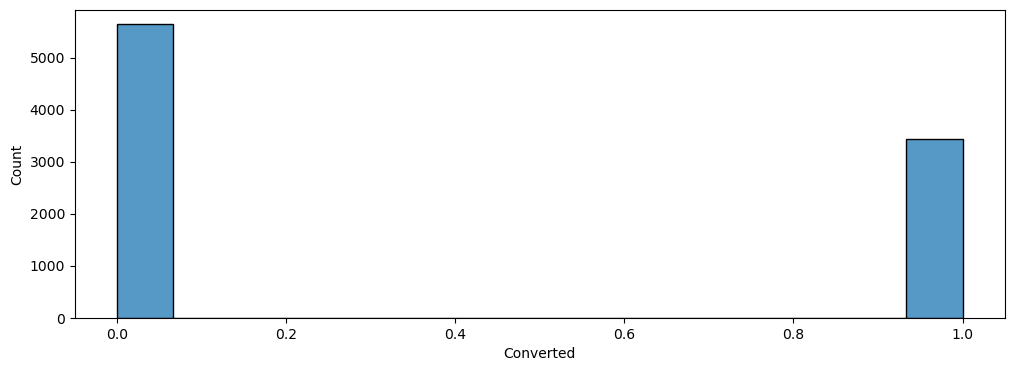

Histogram of TotalVisits


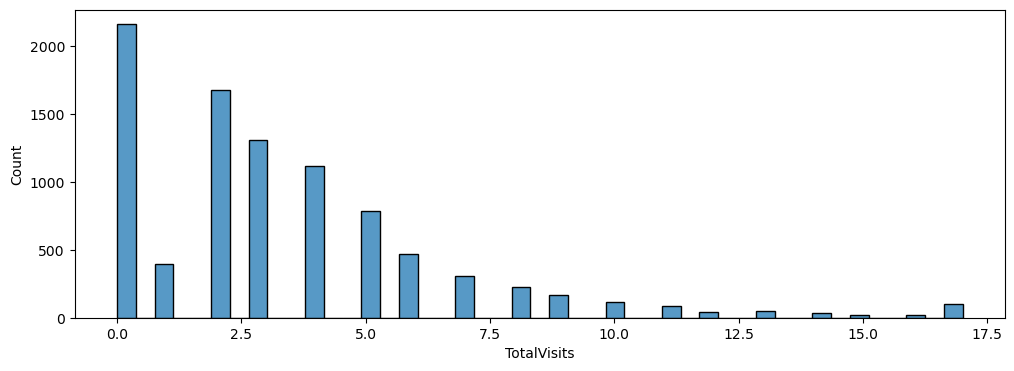

Histogram of Total Time Spent on Website


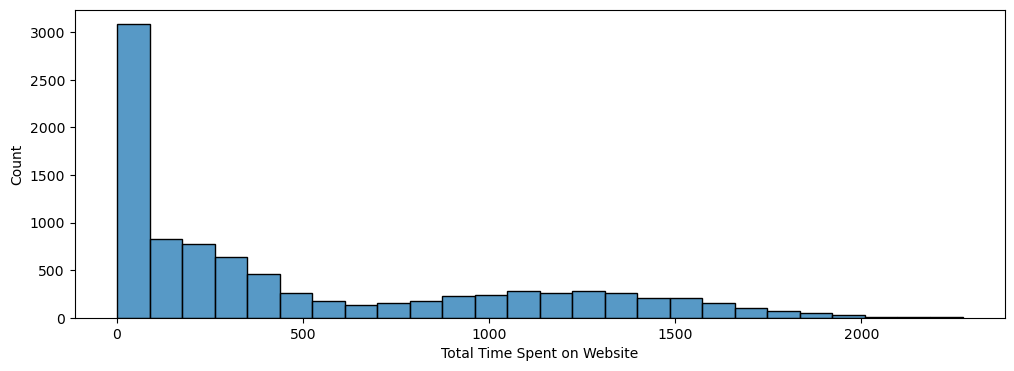

Histogram of Page Views Per Visit


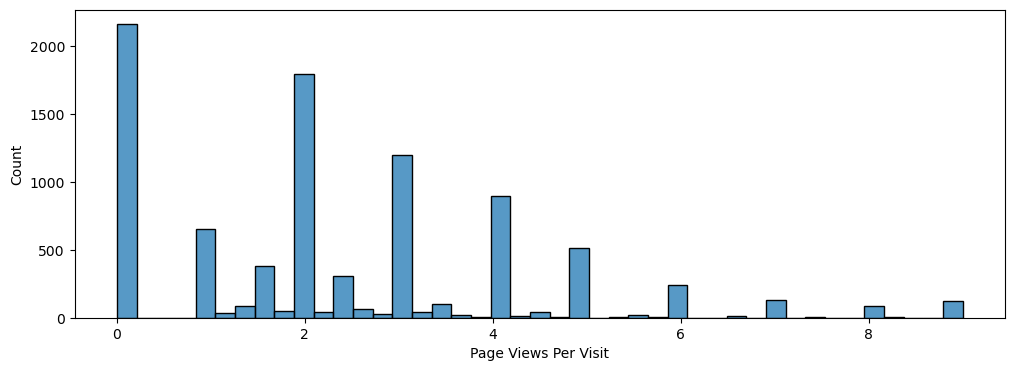

In [371]:
# Plotting Histogram for continuous columns for leads dataframe.
for i in cont_variable:
    print("Histogram of",i)
    plt.figure(figsize=(12,4))
    sns.histplot(leads[i])
    plt.show()

Count Plot of Lead Origin


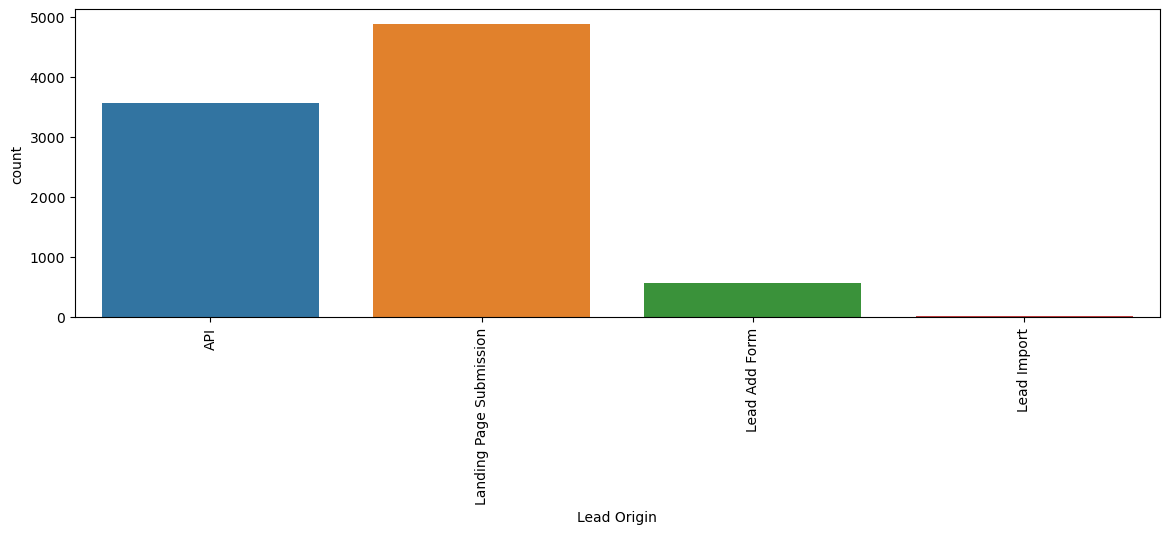

Count Plot of Lead Source


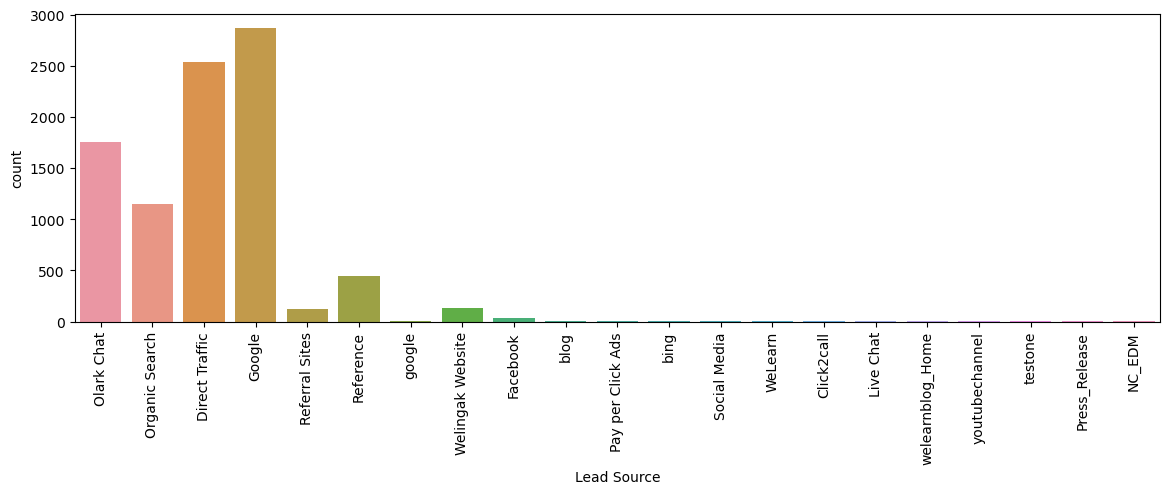

Count Plot of Do Not Email


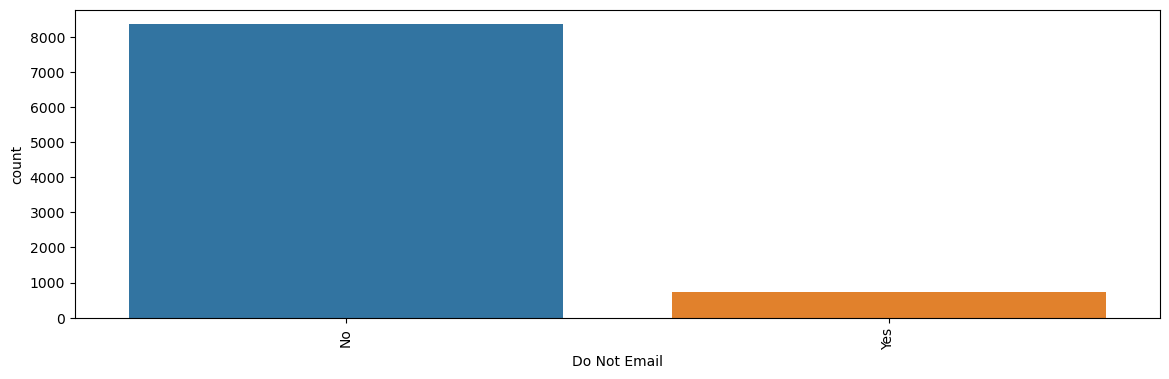

Count Plot of Do Not Call


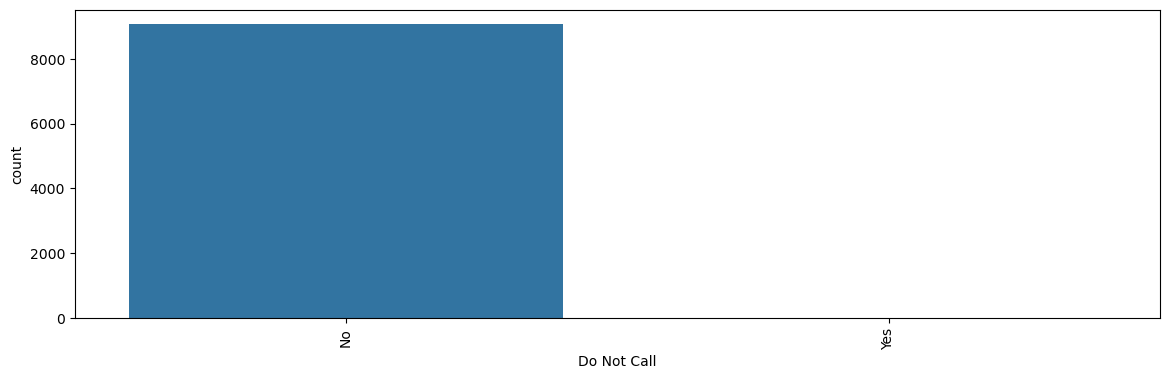

Count Plot of Last Activity


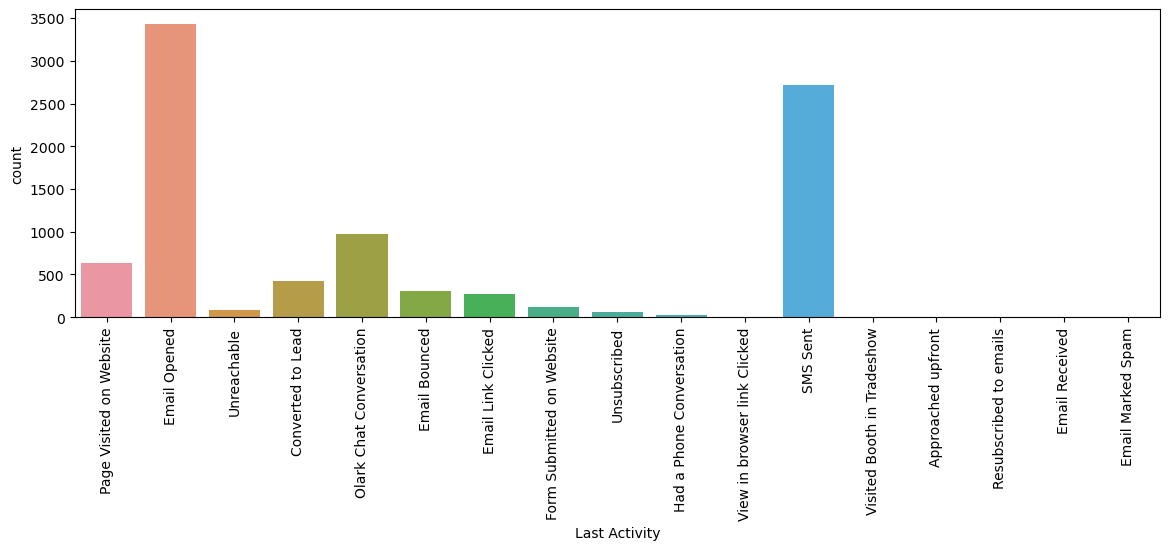

Count Plot of Country


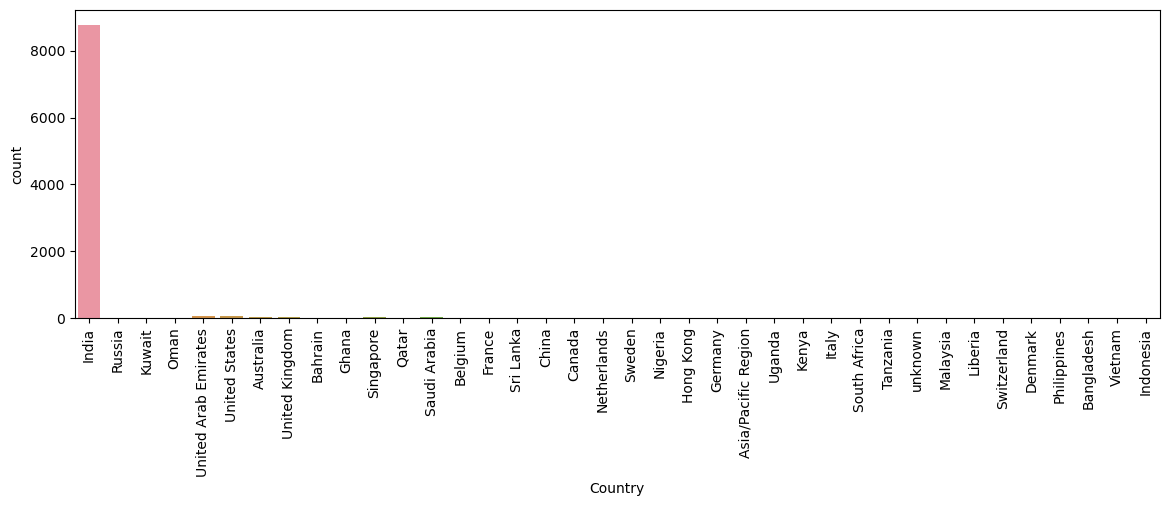

Count Plot of Specialization


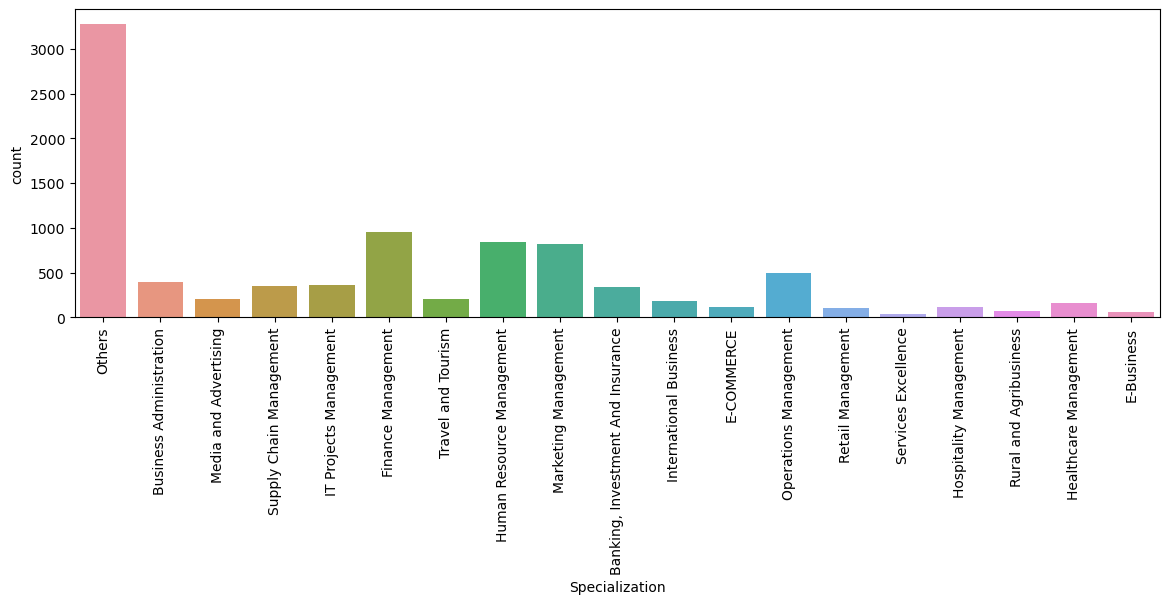

Count Plot of What is your current occupation


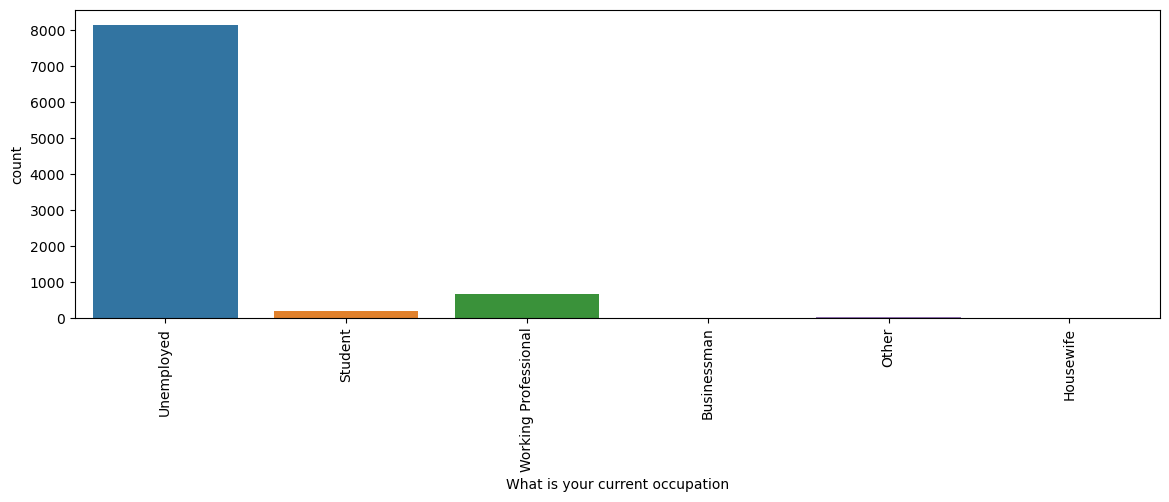

Count Plot of What matters most to you in choosing a course


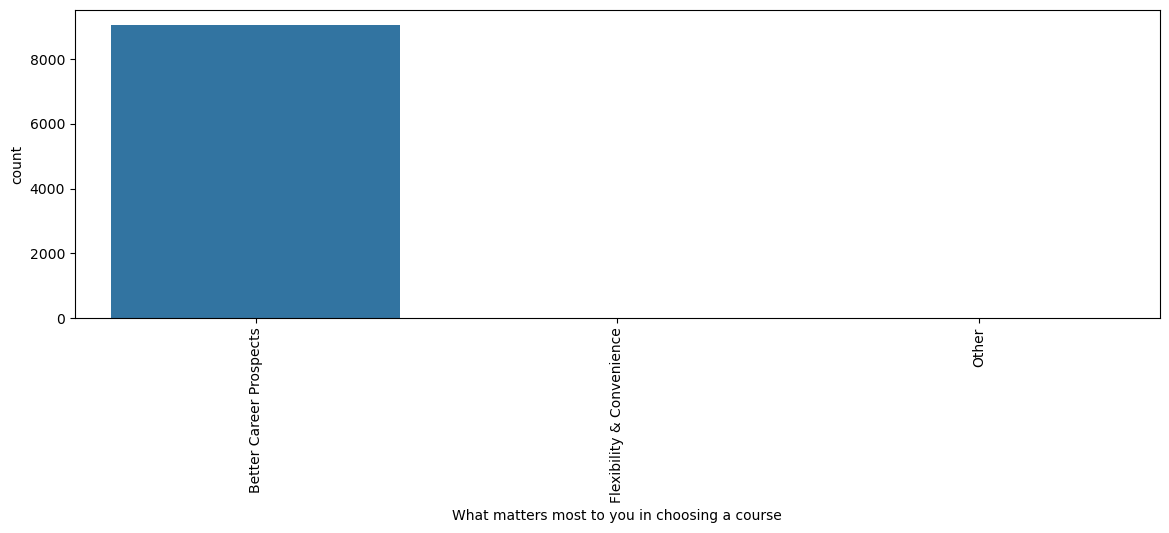

Count Plot of Search


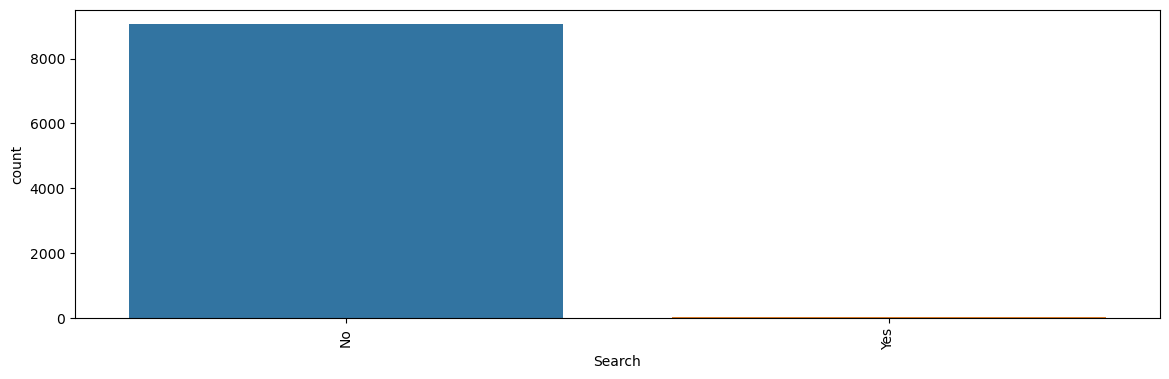

Count Plot of Magazine


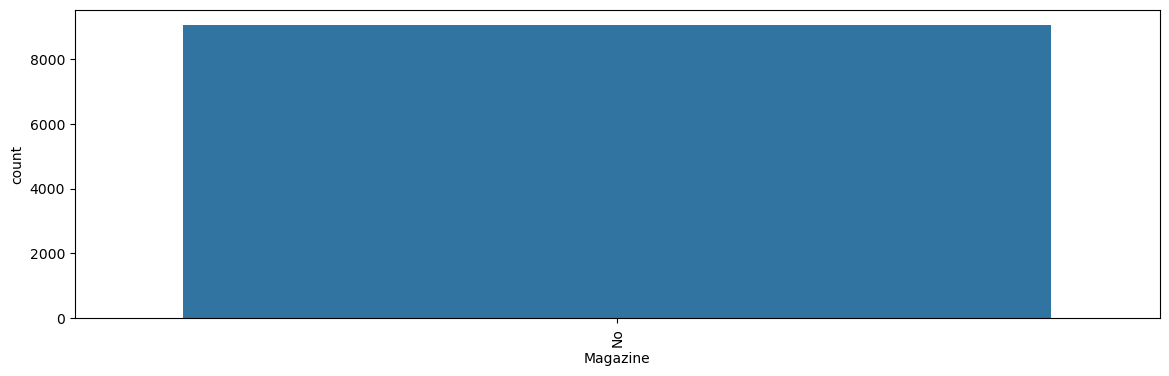

Count Plot of Newspaper Article


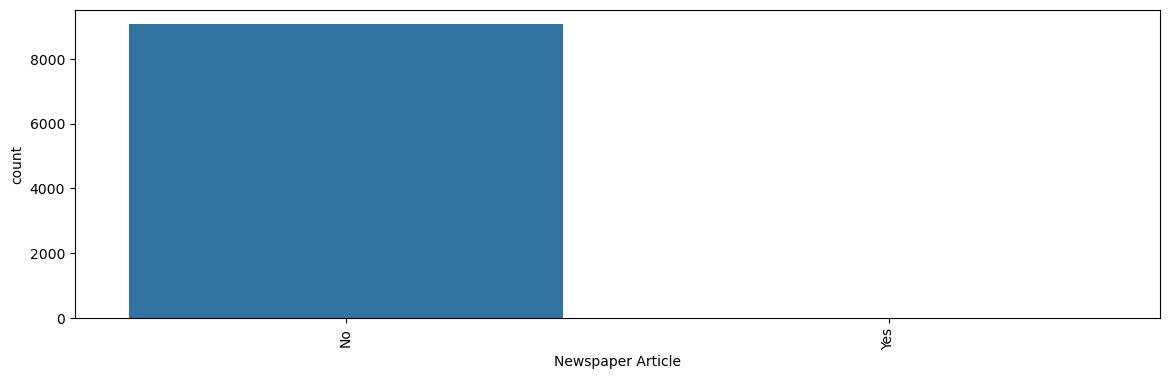

Count Plot of X Education Forums


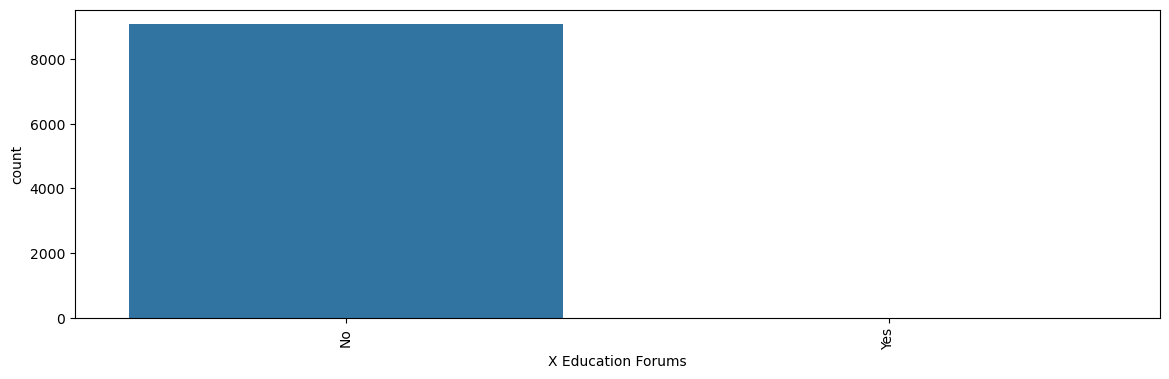

Count Plot of Newspaper


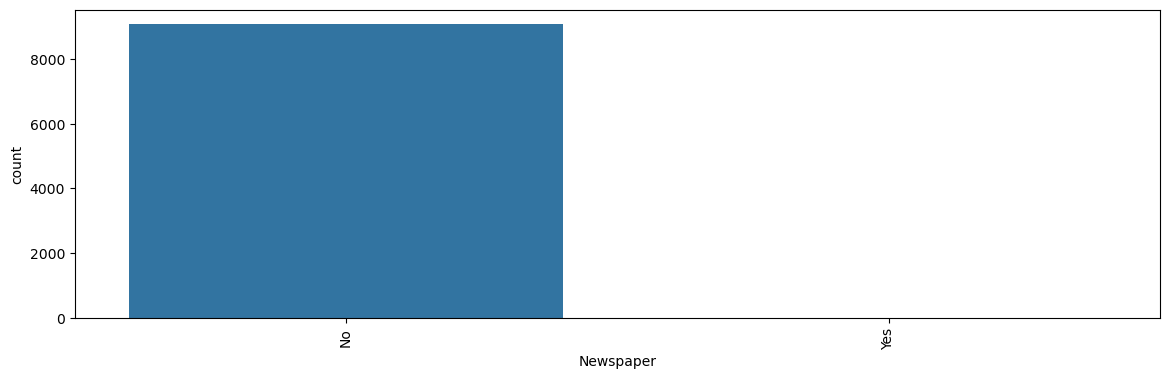

Count Plot of Digital Advertisement


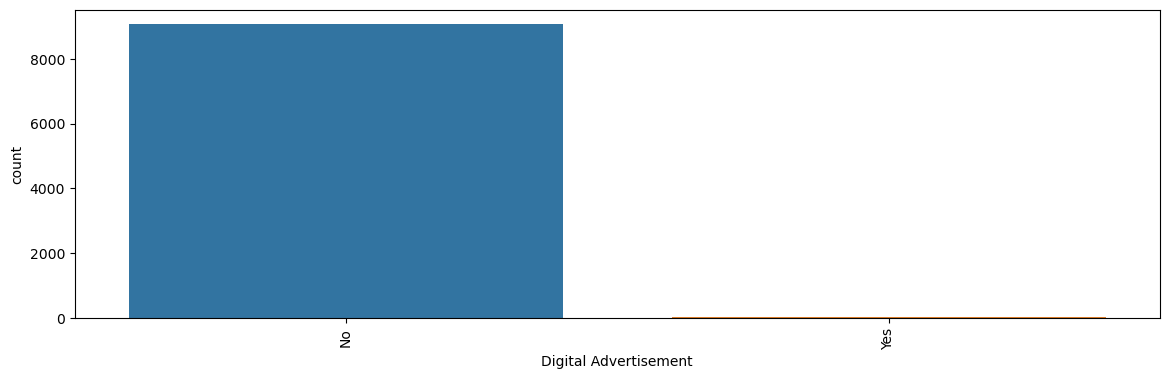

Count Plot of Through Recommendations


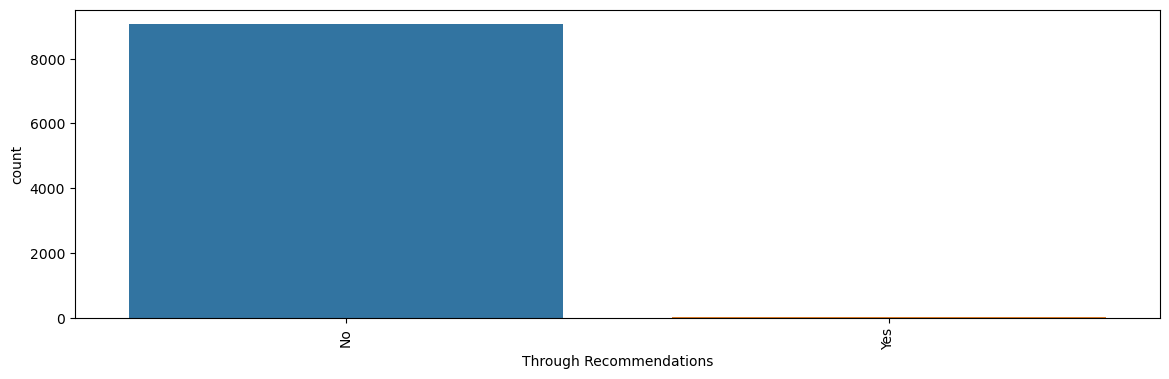

Count Plot of Receive More Updates About Our Courses


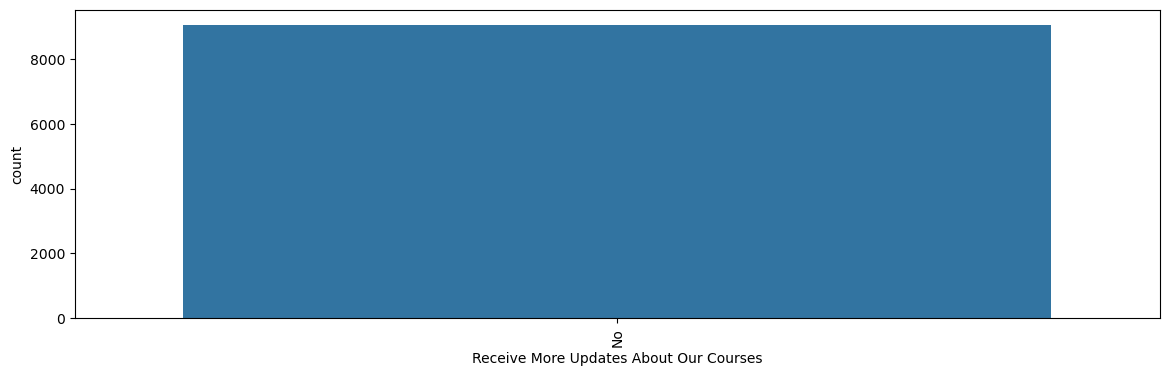

Count Plot of Tags


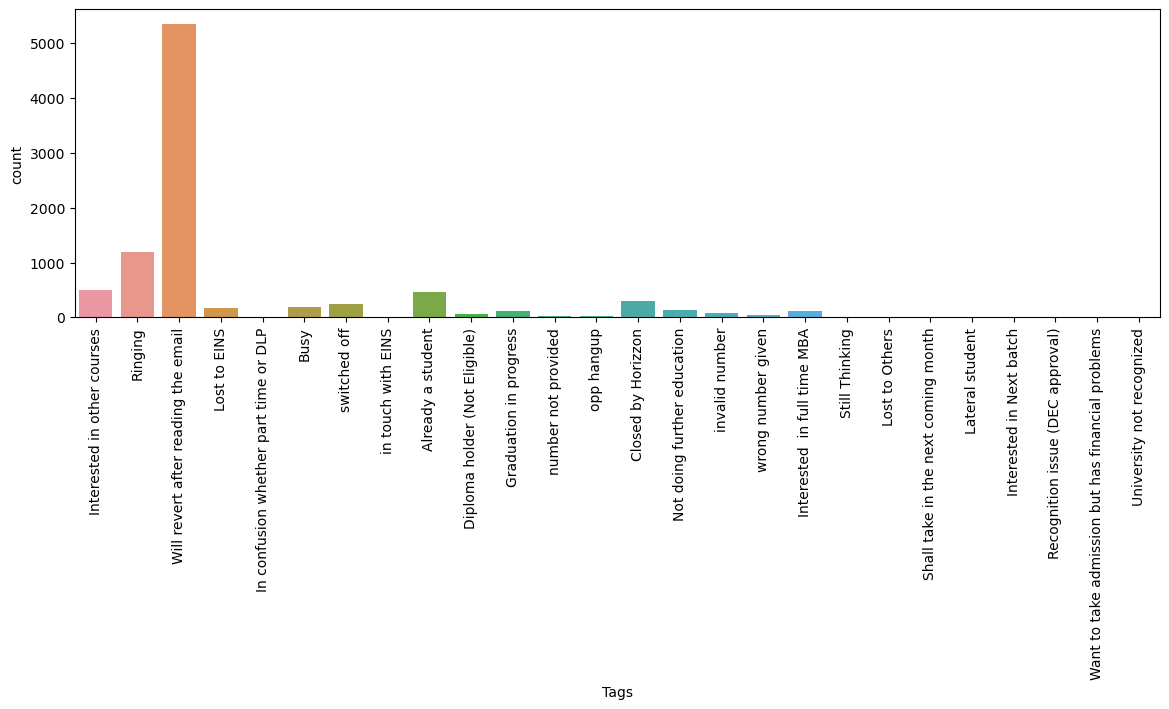

Count Plot of Update me on Supply Chain Content


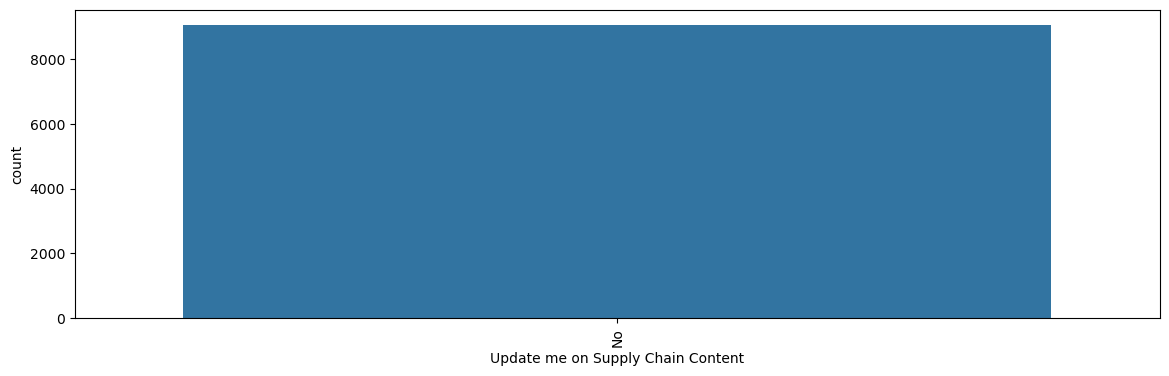

Count Plot of Get updates on DM Content


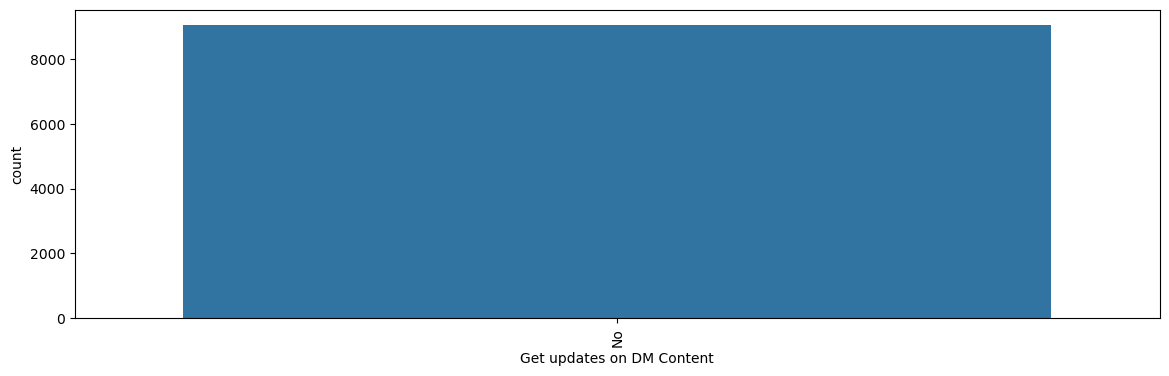

Count Plot of City


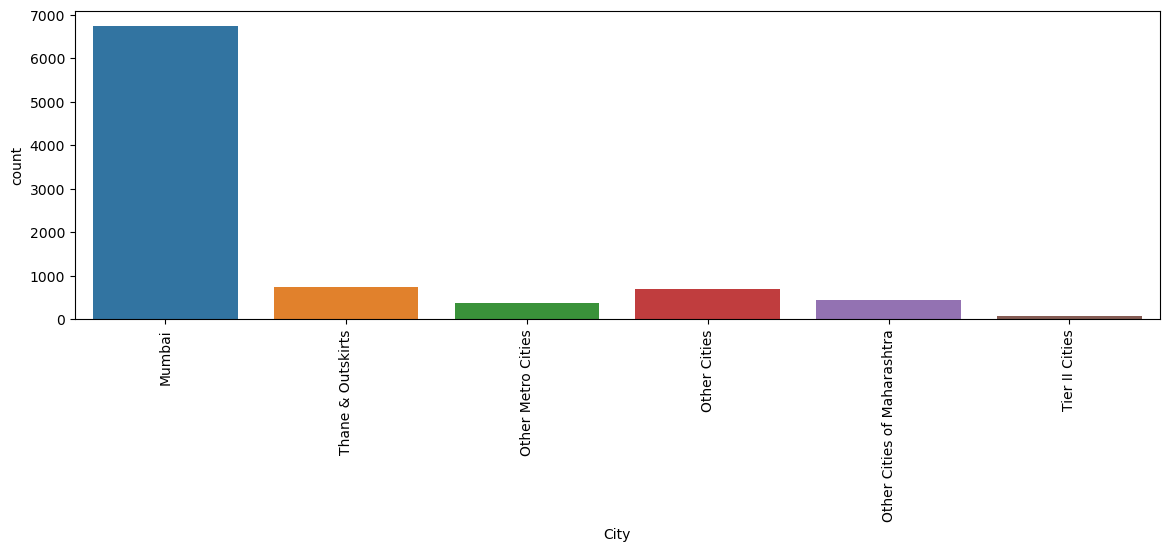

Count Plot of I agree to pay the amount through cheque


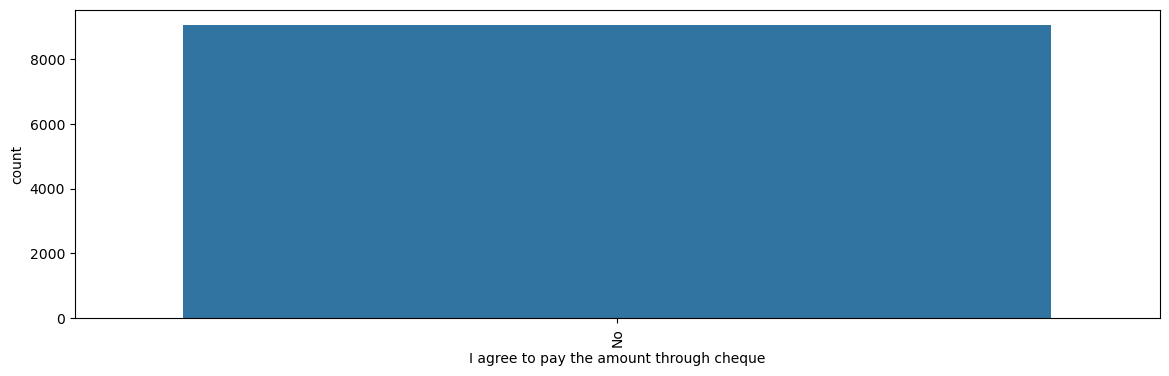

Count Plot of A free copy of Mastering The Interview


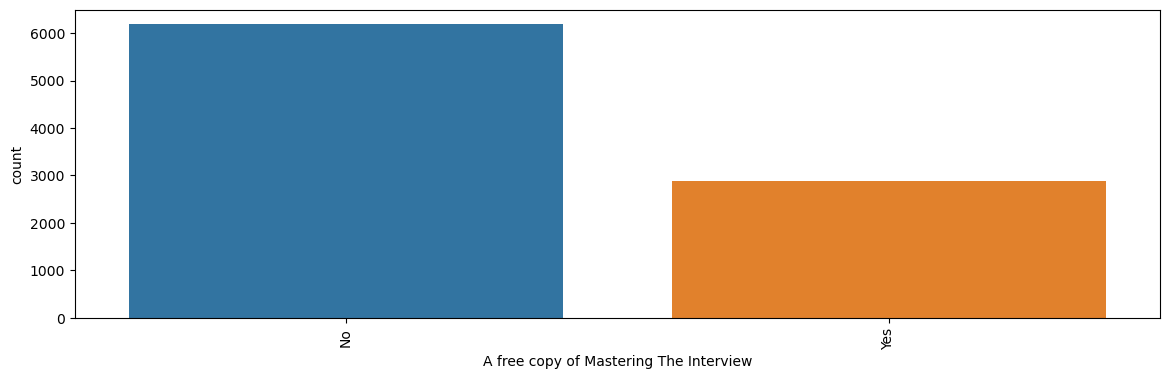

Count Plot of Last Notable Activity


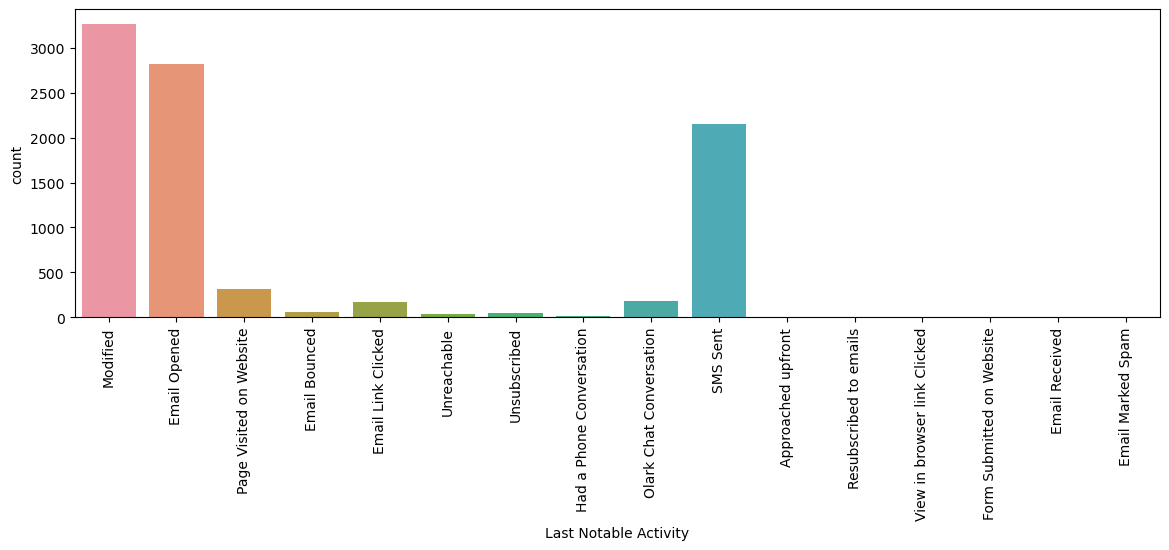

In [372]:
# Plotting Count Plot for categorical columns for Target=0(non-defaulters) dataframe.
for i in cat_variable:
    print("Count Plot of",i)
    plt.figure(figsize=(14,4))
    sns.countplot(leads[i])
    plt.xticks(rotation=90)
    plt.show()

In [373]:
## Mention value_counts to check imbalance in variables
for i in cat_variable:
    print(leads[i].value_counts())


Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
No     8358
Yes     716
Name: Do Not Email, dtype: int64
No     9072
Yes       2
Name: Do Not Call, dtype: int64
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
C

In [374]:
## Imbalanced Variables can be dropped
cols_to_drop=['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Notable Activity',
  'City','Specialization','Tags','Do Not Call']

leads = leads.drop(cols_to_drop,axis=1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   What is your current occupation  9074 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 708.9+ KB


Inference
- Maximum leads are generated by Google and Direct Traffic
- Maximum leads are generated having last activity as Email opened.
- Maximum leads generated are 'unemployed'.
- Maximum leads will prefer to revert after reading the email
- Maximum leads are generated having last activity as Email opened.

## Step4: Bivariate Analysis

Scatter plot of Converted and Converted for defaulters


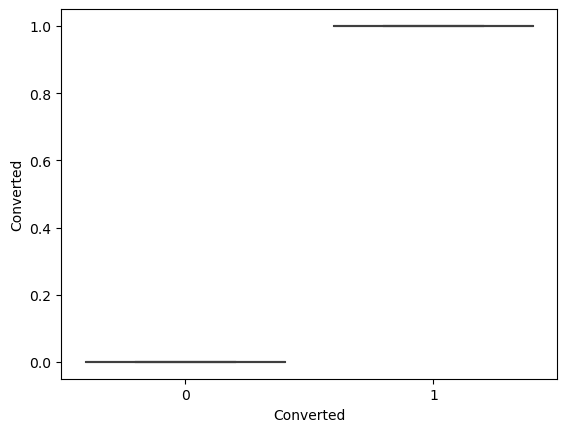

Scatter plot of Converted and TotalVisits for defaulters


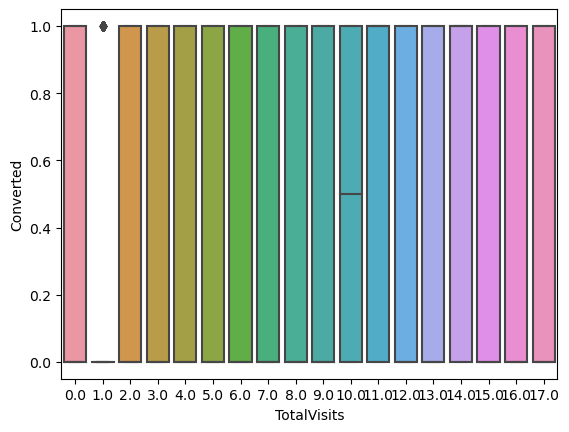

Scatter plot of Converted and Total Time Spent on Website for defaulters


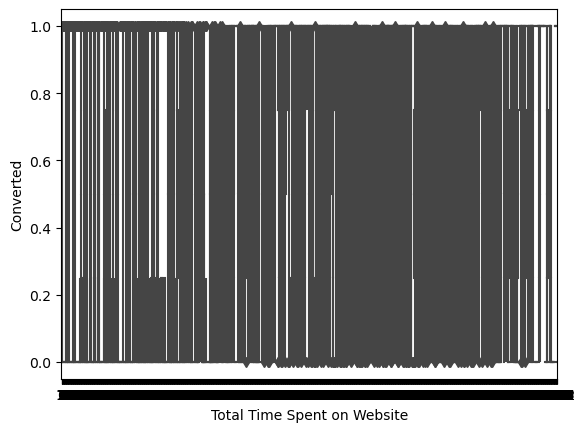

Scatter plot of Converted and Page Views Per Visit for defaulters


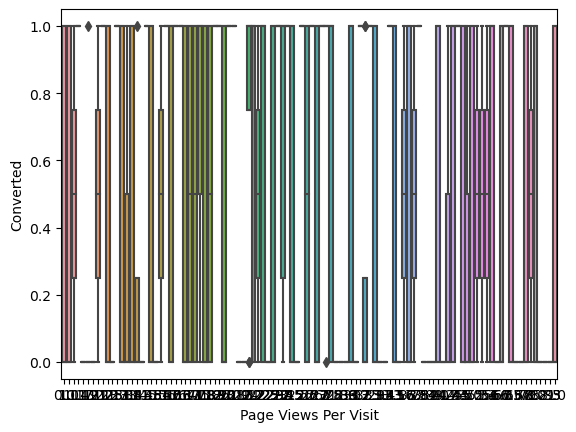

Scatter plot of TotalVisits and Converted for defaulters


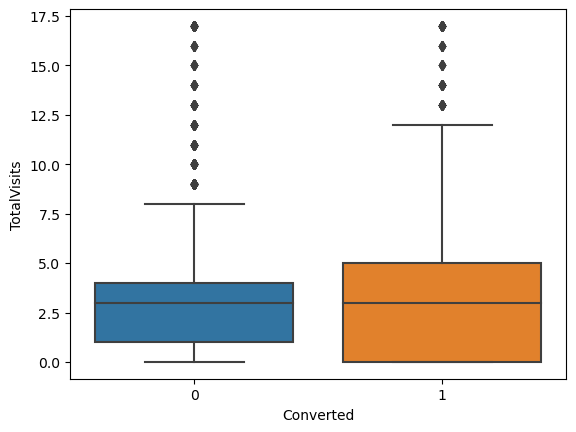

Scatter plot of TotalVisits and TotalVisits for defaulters


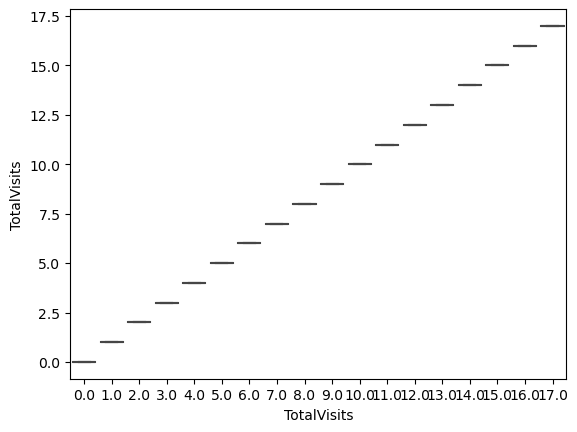

Scatter plot of TotalVisits and Total Time Spent on Website for defaulters


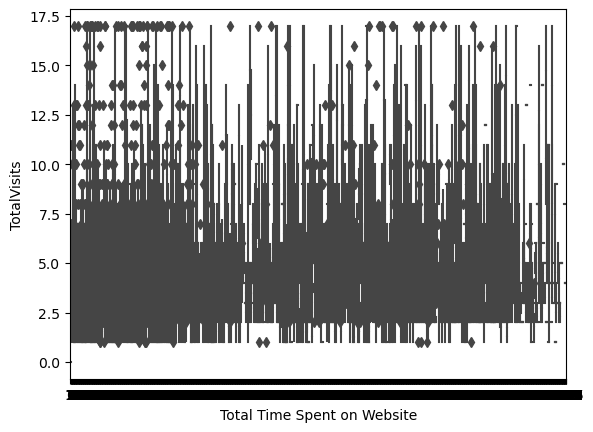

Scatter plot of TotalVisits and Page Views Per Visit for defaulters


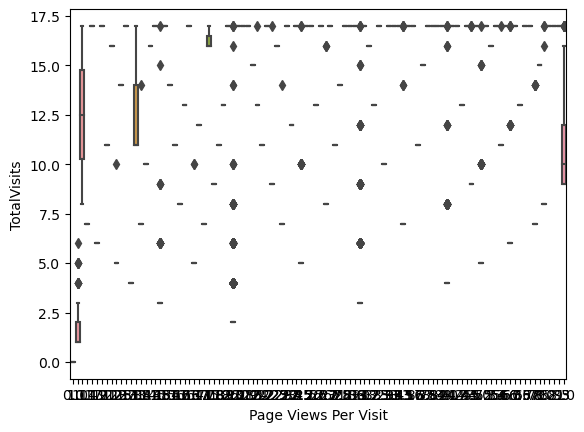

Scatter plot of Total Time Spent on Website and Converted for defaulters


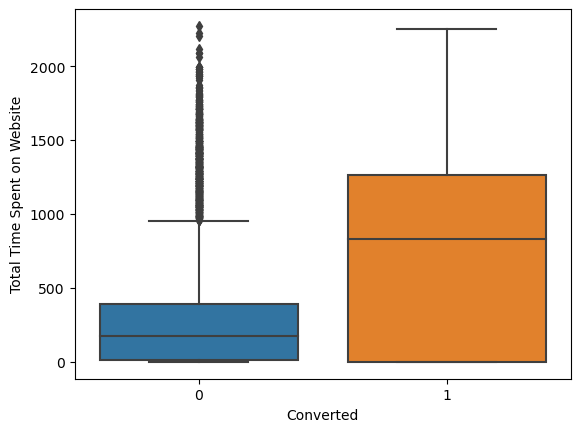

Scatter plot of Total Time Spent on Website and TotalVisits for defaulters


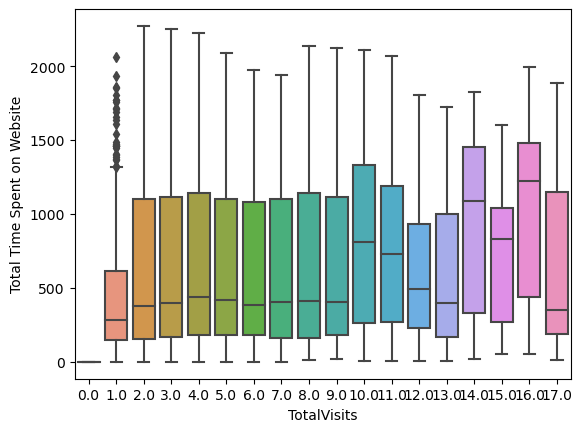

Scatter plot of Total Time Spent on Website and Total Time Spent on Website for defaulters


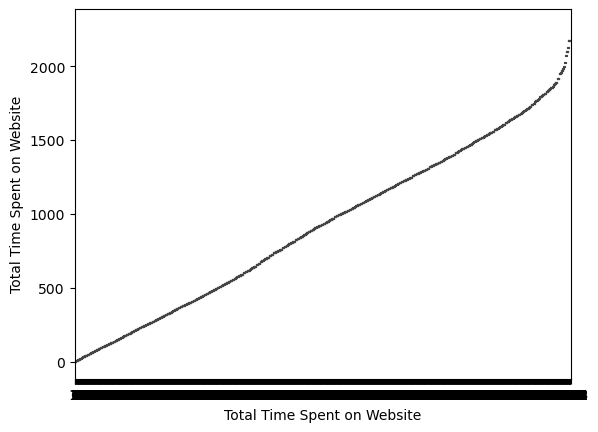

Scatter plot of Total Time Spent on Website and Page Views Per Visit for defaulters


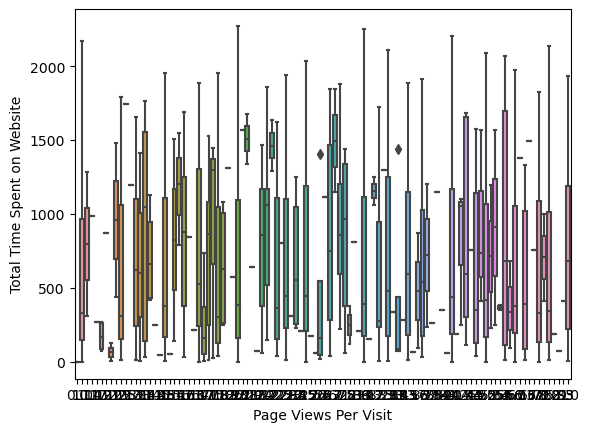

Scatter plot of Page Views Per Visit and Converted for defaulters


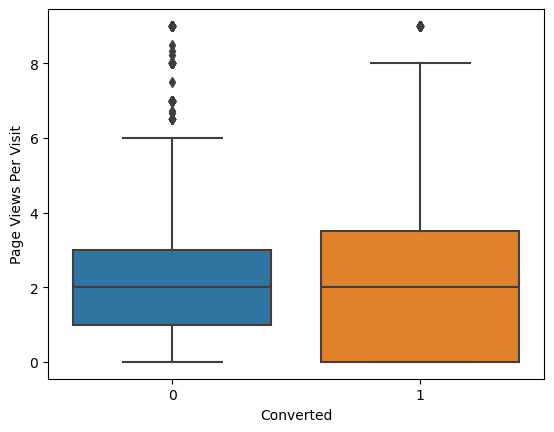

Scatter plot of Page Views Per Visit and TotalVisits for defaulters


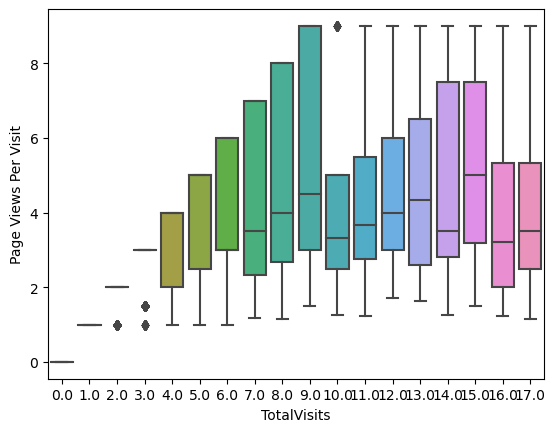

Scatter plot of Page Views Per Visit and Total Time Spent on Website for defaulters


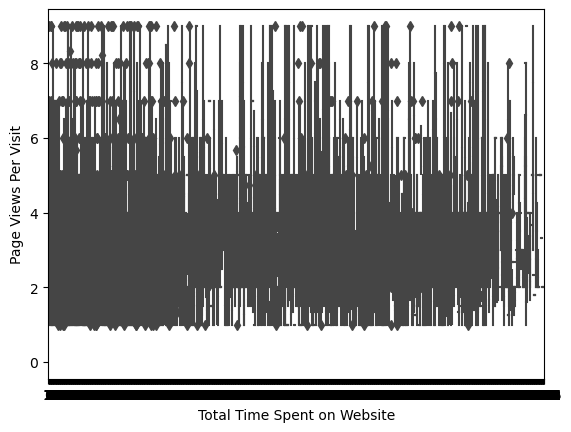

Scatter plot of Page Views Per Visit and Page Views Per Visit for defaulters


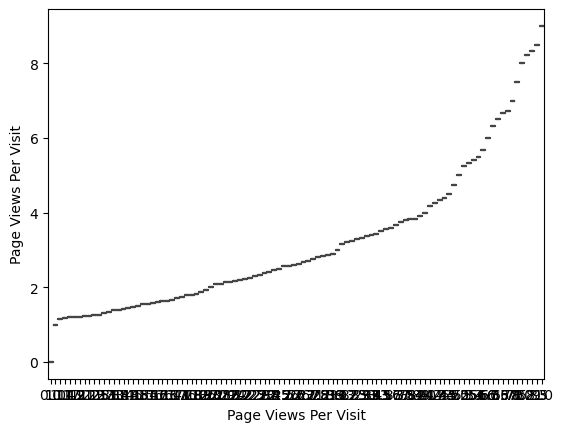

In [477]:
# Plotting scatterplot to determine the relaionship between two continuous columns for leads dataframe
for i in cont_variable:
    for j in cont_variable:
        print("Scatter plot of {x} and {y} for defaulters".format(x=i,y=j))
        sns.boxplot(leads[j],leads[i])
        plt.show()

Inference
- As the median for both converted and non-converted leads are same , nothing conclusive can be said on the basis of variable TotalVisits
- As can be seen, leads spending more time on website are more likely to convert.
- As the median for both converted and non-converted leads are same , nothing conclusive can be said on the basis of variable Page Views Per Visit

## Step 5: Multivariate Analysis

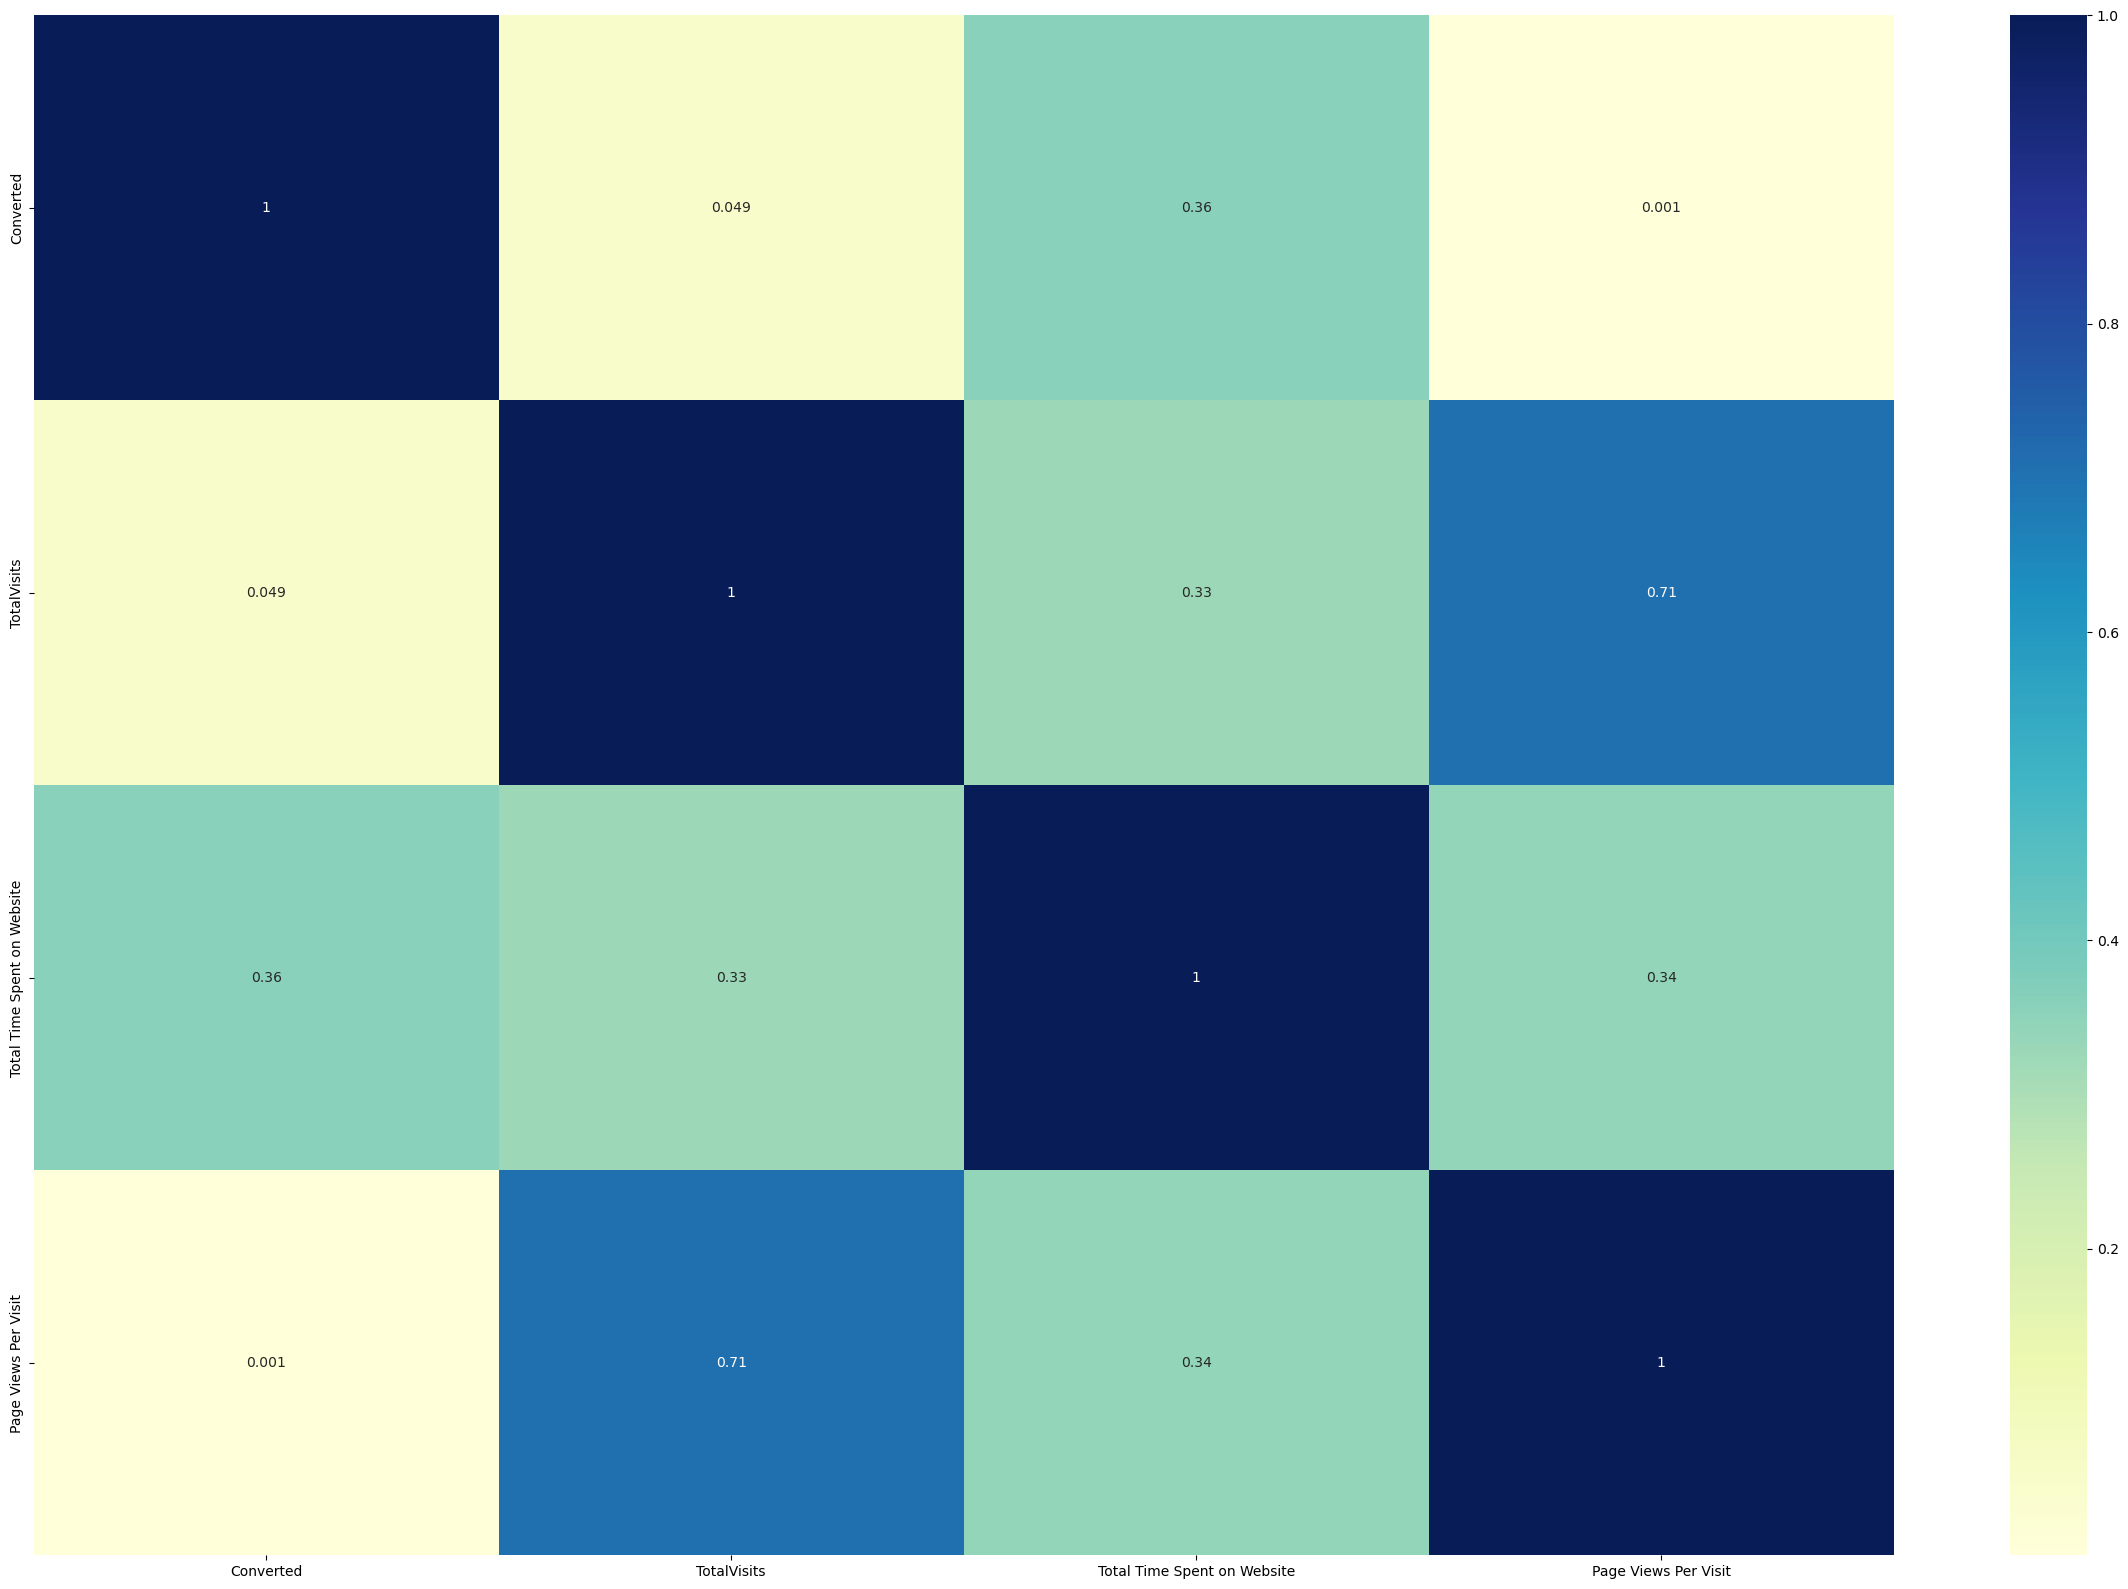

In [376]:
# Plotting heatmap to analyze more than two variables at a time
plt.figure(figsize=(30,20))
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

Inference
- We can observe that the variables are not highly correlated with each other except the variables 'TotalVisits' and 'Page Views Per Visit' with correlation of 0.71.

## Step 6: Dummy Variable Creation

In [377]:
## Creating dummy variables

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation'],
      dtype='object')

In [378]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads[varlist] = leads[varlist].apply(binary_map)

In [379]:
dummy = pd.get_dummies(leads[['Lead Source','Lead Origin','What is your current occupation','Last Activity']], drop_first=True)
leads = pd.concat([leads,dummy],1)




In [380]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [381]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 7: Train-Test Split

In [382]:
from sklearn.model_selection import train_test_split

In [383]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [384]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [385]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step8: Feature Scaling

In [386]:
from sklearn.preprocessing import StandardScaler

In [387]:
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
3009,-0.417238,-0.160255,-0.177298,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,-0.417238,-0.540048,-0.177298,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-1.034493,-0.888650,-1.183128,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4750,-0.417238,1.643304,-0.177298,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7987,0.508645,2.017593,0.074159,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Step9: Looking at the Correlations

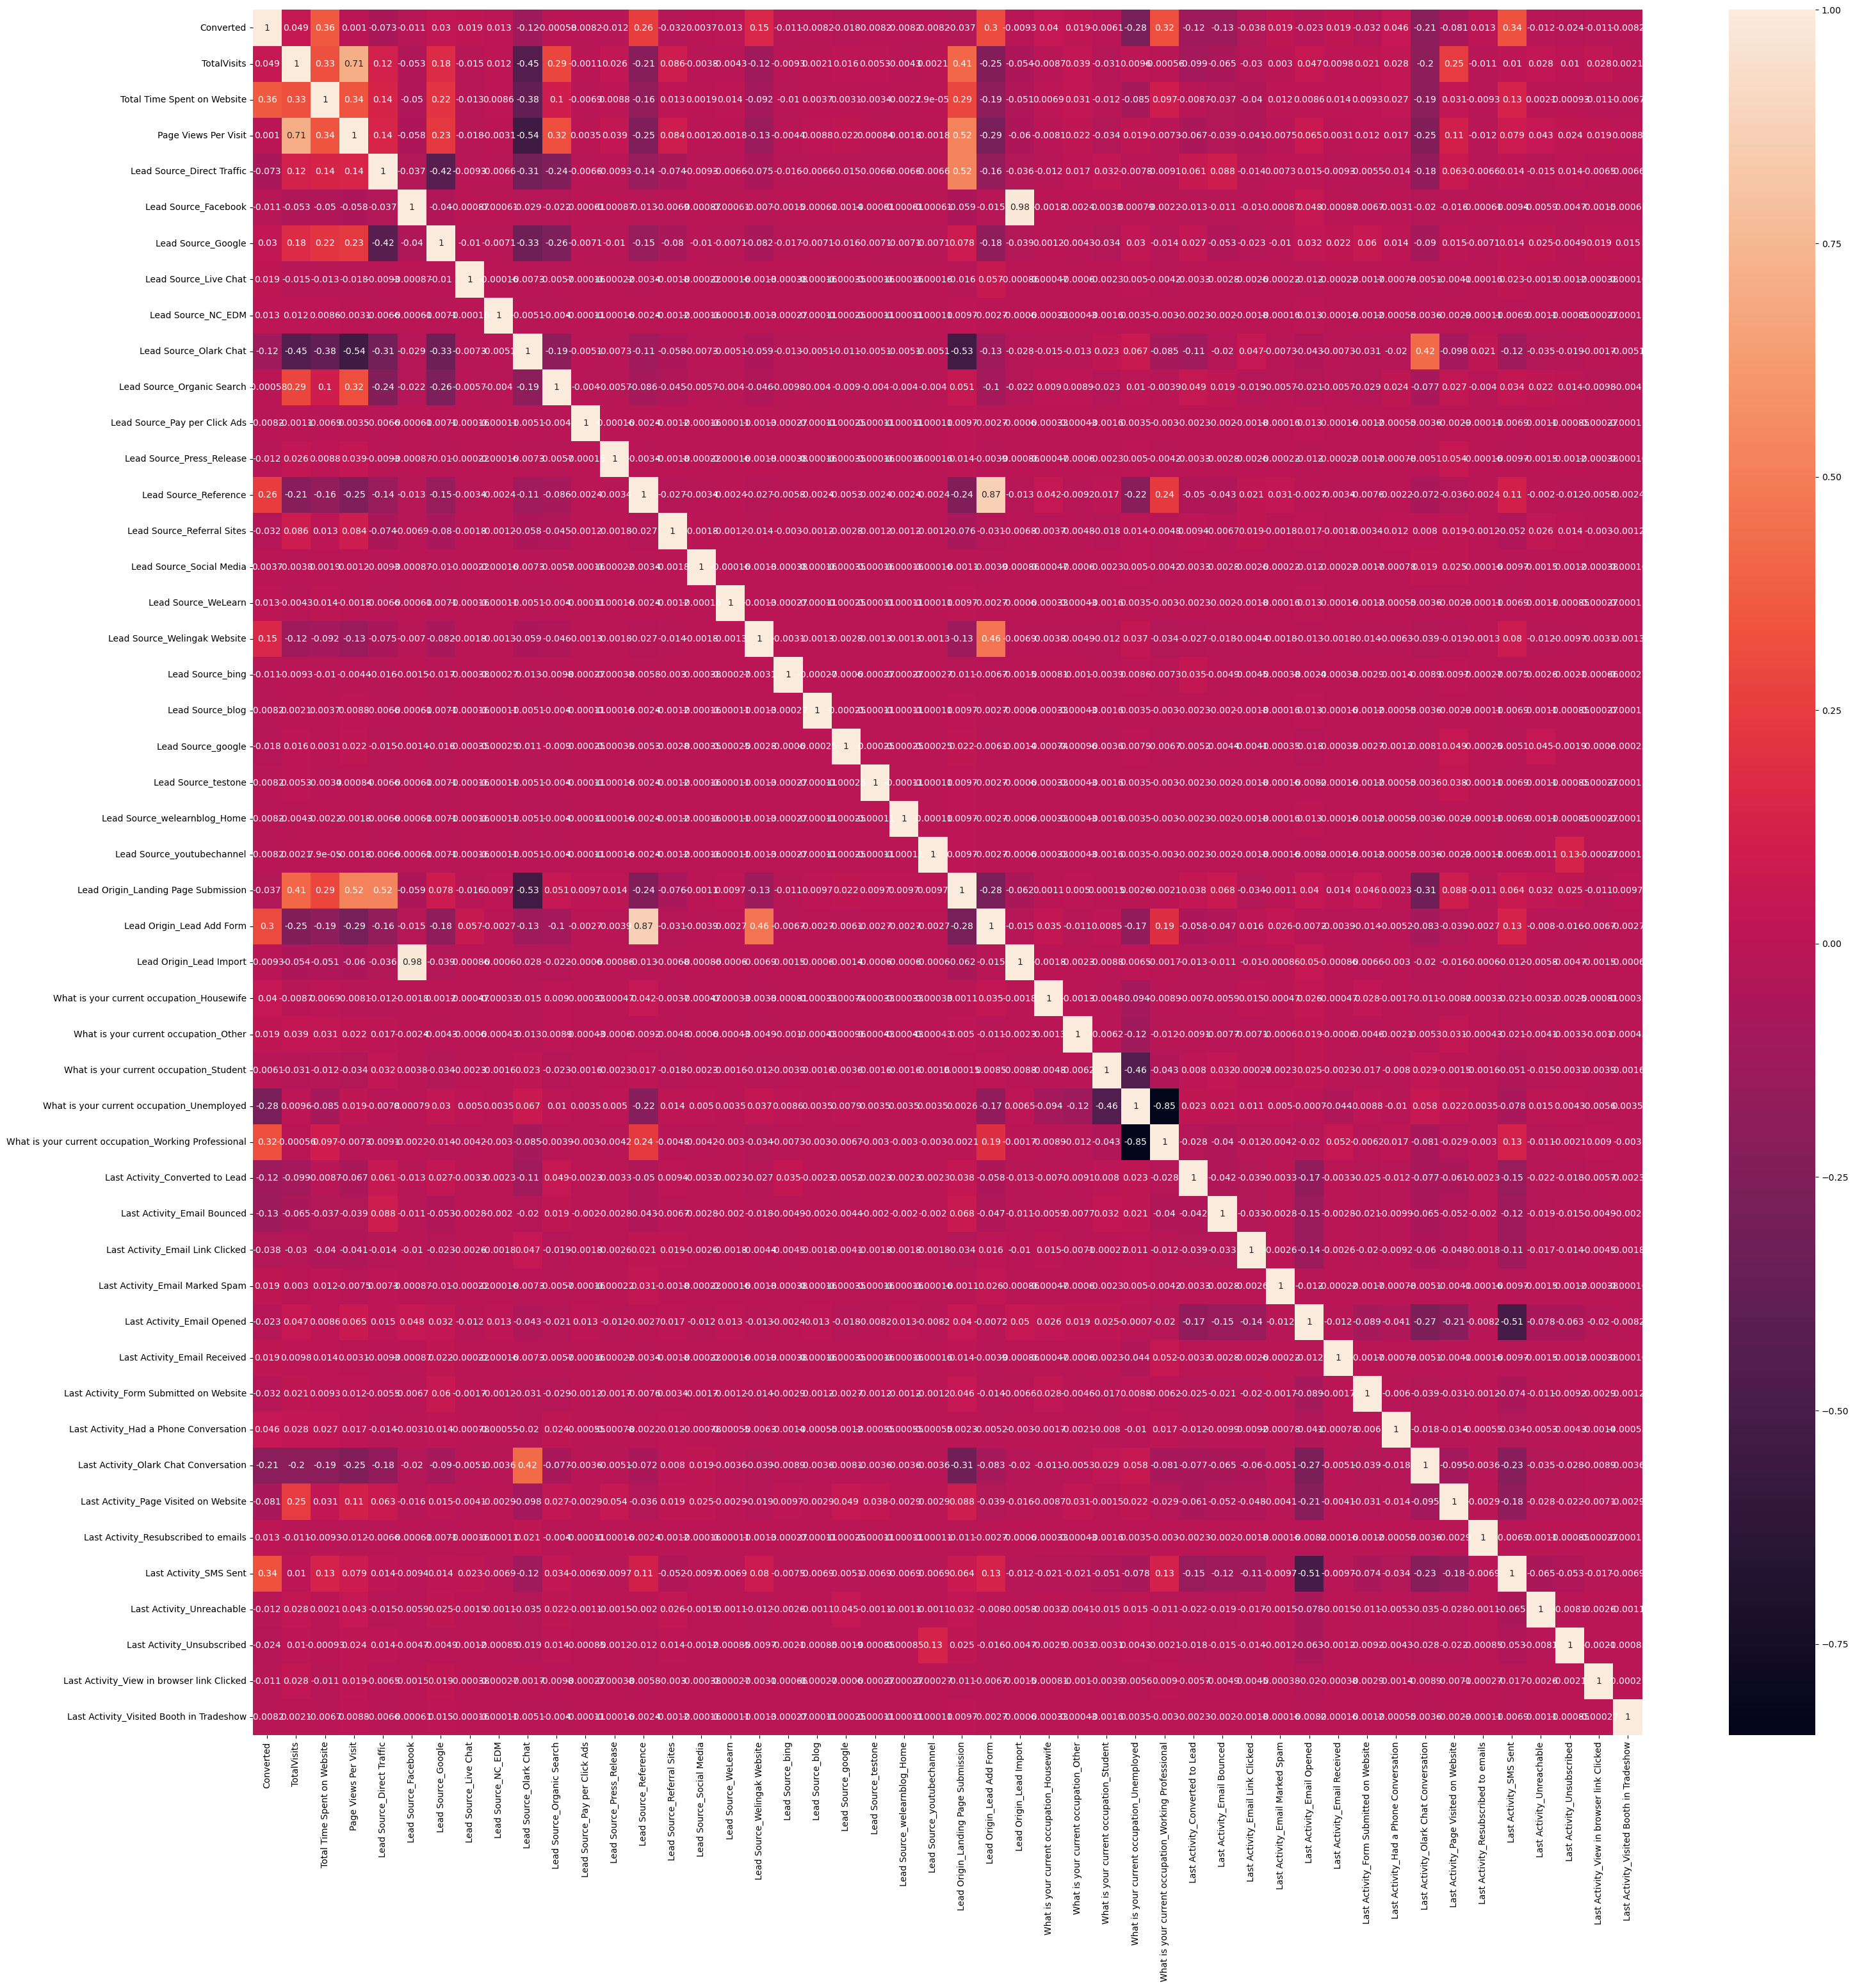

In [388]:
# Let's see the correlation matrix 
plt.figure(figsize = (35,35))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [389]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

## Step10: Model Building

### Feature Selection using RFE

In [390]:
import statsmodels.api as sm

In [391]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [392]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [393]:
rfe.support_

array([False,  True, False,  True, False,  True, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False,  True,  True,  True, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False])

In [394]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 23),
 ('Lead Source_NC_EDM', False, 26),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 21),
 ('Lead Source_Press_Release', False, 5),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 14),
 ('Lead Source_WeLearn', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_blog', False, 9),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 24),
 ('Lead Source_welearnblog_Home', False, 13),
 ('Lead Source_youtubechannel', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('What is your current occupation_Housewife', True, 1),


In [395]:
col = X_train.columns[rfe.support_]

In [396]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Lead Origin_Lead Import',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link

#### Assessing the models with statsmodels

In [397]:
# Model 1
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2720.6
Date:                Thu, 18 May 2023   Deviance:                       5441.2
Time:                        20:01:44   Pearson chi2:                 6.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3789
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1156      0.089     -1.298      0.194      -0.290       0.059
Total Time Spent on Website                              1.1316      0.040     28.554      0.000       1.054       1.209
Lead Source_Direct Traffic                              -1.5044      0.115    -13.117      0.000      -1.729      -1.280
Lead Source_Google                                      -1.1088      0.108    -10.249      0.000      -1.321      -0.897
Lead Source_Organic Search                              -1.3227      0.132    -10.014      0.000      -1.582      -1.064
Lead Source_Referral Sites                              -1.5361      0.345     -4.453      0.000      -2.212      -0.860
Lead Source_Welingak Website                             2.0010      0.757      2.644      0.008       0.518       3.484
Lead Source_google                                     -23.1285   2.26e+04     -0.001      0.999   -4.43e+04    4.43e+04
Lead Origin_Lead Add Form                                2.5493      0.224     11.362      0.000       2.110       2.989
What is your current occupation_Housewife               23.0136   1.55e+04      0.001      0.999   -3.04e+04    3.04e+04
What is your current occupation_Working Professional     2.8080      0.187     15.043      0.000       2.442       3.174
Last Activity_Converted to Lead                         -1.2260      0.221     -5.554      0.000      -1.659      -0.793
Last Activity_Email Bounced                             -2.1787      0.371     -5.880      0.000      -2.905      -1.452
Last Activity_Had a Phone Conversation                   2.5894      0.699      3.706      0.000       1.220       3.959
Last Activity_Olark Chat Conversation                   -1.5107      0.160     -9.446      0.000      -1.824      -1.197
Last Activity_SMS Sent                                   1.1717      0.073     16.009      0.000       1.028       1.315
========================================================================================================================
"""

In [398]:
col=col.drop('Lead Source_google',1)

In [399]:
# Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2724.7
Date:                Thu, 18 May 2023   Deviance:                       5449.3
Time:                        20:01:44   Pearson chi2:                 6.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3781
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1348      0.089     -1.517      0.129      -0.309       0.039
Total Time Spent on Website                              1.1269      0.040     28.514      0.000       1.049       1.204
Lead Source_Direct Traffic                              -1.4833      0.114    -12.965      0.000      -1.708      -1.259
Lead Source_Google                                      -1.0882      0.108    -10.083      0.000      -1.300      -0.877
Lead Source_Organic Search                              -1.3019      0.132     -9.877      0.000      -1.560      -1.044
Lead Source_Referral Sites                              -1.5168      0.345     -4.401      0.000      -2.192      -0.841
Lead Source_Welingak Website                             2.0001      0.757      2.643      0.008       0.517       3.483
Lead Origin_Lead Add Form                                2.5643      0.224     11.430      0.000       2.125       3.004
What is your current occupation_Housewife               23.0110   1.55e+04      0.001      0.999   -3.04e+04    3.04e+04
What is your current occupation_Working Professional     2.8082      0.187     15.052      0.000       2.443       3.174
Last Activity_Converted to Lead                         -1.2245      0.221     -5.551      0.000      -1.657      -0.792
Last Activity_Email Bounced                             -2.1743      0.370     -5.870      0.000      -2.900      -1.448
Last Activity_Had a Phone Conversation                   2.5872      0.698      3.705      0.000       1.219       3.956
Last Activity_Olark Chat Conversation                   -1.4996      0.160     -9.381      0.000      -1.813      -1.186
Last Activity_SMS Sent                                   1.1719      0.073     16.028      0.000       1.029       1.315
========================================================================================================================
"""

In [400]:
col=col.drop('What is your current occupation_Housewife',1)

In [401]:
# Model 3
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2729.7
Date:                Thu, 18 May 2023   Deviance:                       5459.5
Time:                        20:01:44   Pearson chi2:                 6.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3771
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1326      0.089     -1.494      0.135      -0.307       0.041
Total Time Spent on Website                              1.1265      0.039     28.537      0.000       1.049       1.204
Lead Source_Direct Traffic                              -1.4793      0.114    -12.943      0.000      -1.703      -1.255
Lead Source_Google                                      -1.0867      0.108    -10.074      0.000      -1.298      -0.875
Lead Source_Organic Search                              -1.2894      0.132     -9.802      0.000      -1.547      -1.032
Lead Source_Referral Sites                              -1.5168      0.345     -4.403      0.000      -2.192      -0.842
Lead Source_Welingak Website                             1.9765      0.757      2.612      0.009       0.493       3.460
Lead Origin_Lead Add Form                                2.5880      0.224     11.552      0.000       2.149       3.027
What is your current occupation_Working Professional     2.8038      0.187     15.029      0.000       2.438       3.169
Last Activity_Converted to Lead                         -1.2305      0.221     -5.580      0.000      -1.663      -0.798
Last Activity_Email Bounced                             -2.1805      0.370     -5.887      0.000      -2.906      -1.455
Last Activity_Had a Phone Conversation                   2.5804      0.698      3.695      0.000       1.212       3.949
Last Activity_Olark Chat Conversation                   -1.5031      0.160     -9.404      0.000      -1.816      -1.190
Last Activity_SMS Sent                                   1.1657      0.073     15.955      0.000       1.022       1.309
========================================================================================================================
"""

### Checking VIF's

In [402]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [403]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Origin_Lead Add Form,1.56
12,Last Activity_SMS Sent,1.53
5,Lead Source_Welingak Website,1.33
1,Lead Source_Direct Traffic,1.29
2,Lead Source_Google,1.29
0,Total Time Spent on Website,1.18
7,What is your current occupation_Working Profes...,1.17
3,Lead Source_Organic Search,1.15
8,Last Activity_Converted to Lead,1.11
11,Last Activity_Olark Chat Conversation,1.08


### Making Predictions on Train set

In [404]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.142769
1012    0.168401
9226    0.508009
4750    0.802949
7987    0.861338
1281    0.726925
2880    0.098675
4971    0.890025
7536    0.813826
1248    0.838436
dtype: float64

In [405]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14276873, 0.1684012 , 0.50800919, 0.80294891, 0.86133796,
       0.72692461, 0.09867497, 0.89002461, 0.81382648, 0.8384363 ])

In [406]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.142769,3009
1,0,0.168401,1012
2,0,0.508009,9226
3,1,0.802949,4750
4,1,0.861338,7987


In [407]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.142769,3009,0
1,0,0.168401,1012,0
2,0,0.508009,9226,1
3,1,0.802949,4750,1
4,1,0.861338,7987,1


## Step11: Model Evaluation

In [408]:
# Let's take a look at the confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3417,  488],
       [ 715, 1731]], dtype=int64)

In [409]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8105810108644308

### Metrics Beyond Simple Accuracy

In [410]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [411]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7076860179885527

In [412]:
# Let us calculate specificity
TN / float(TN+FP)

0.8750320102432778

In [413]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.12496798975672214


In [414]:
# positive predictive value 
print (TP / float(TP+FP))

0.7800811176205498


In [415]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8269603097773476


## Step12: Plotting ROC Curve

In [416]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [417]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

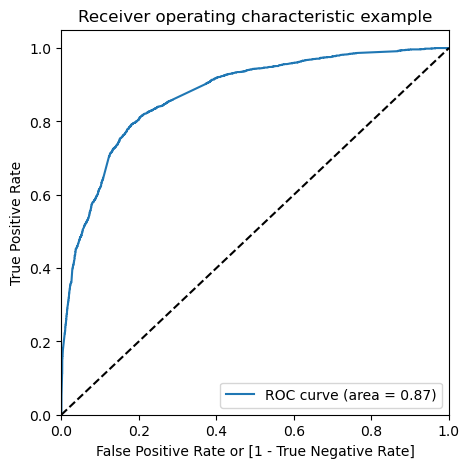

In [418]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- Since we have higher area(ROC curve (area=0.87)), model is good

## Step13: Finding optimal cut-off point

In [419]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.142769,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.168401,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.508009,9226,1,1,1,1,1,1,1,0,0,0,0
3,1,0.802949,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.861338,7987,1,1,1,1,1,1,1,1,1,1,0


In [420]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.582113  0.970973  0.338540
0.2   0.2  0.715635  0.923549  0.585403
0.3   0.3  0.792631  0.828291  0.770294
0.4   0.4  0.810266  0.759199  0.842254
0.5   0.5  0.810581  0.707686  0.875032
0.6   0.6  0.788065  0.579722  0.918566
0.7   0.7  0.772477  0.493050  0.947503
0.8   0.8  0.753267  0.408422  0.969270
0.9   0.9  0.703826  0.248978  0.988732


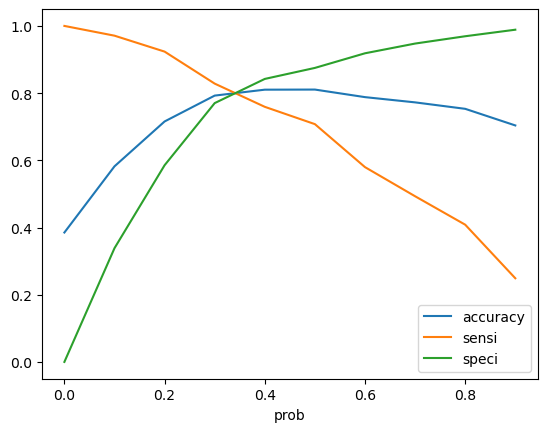

In [421]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the above plot , 0.34 is the optimal cut off point

In [422]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.142769,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.168401,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.508009,9226,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.802949,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.861338,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [423]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8105810108644308

In [424]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3145,  760],
       [ 487, 1959]], dtype=int64)

In [425]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [426]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8008994276369583

In [427]:
# Let us calculate specificity
TN / float(TN+FP)

0.8053777208706786

In [428]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1946222791293214


In [429]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7204854726002207


In [430]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8659140969162996


### Precision and Recall

In [431]:
#Looking at the confusion matrix again

In [432]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3145,  760],
       [ 487, 1959]], dtype=int64)

In [433]:
# Precision:
pre= TP/ (TP + FP)
pre

0.7204854726002207

In [434]:
# Recall:
rec=TP/ (TP + FN)
rec

0.8008994276369583

Using sklearn utilities for the same

In [435]:
from sklearn.metrics import precision_score, recall_score

In [436]:
?precision_score

In [437]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7204854726002207

In [438]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8008994276369583

### Precision and recall tradeoff

In [439]:
from sklearn.metrics import precision_recall_curve

In [440]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: final_predicted, Length: 6351, dtype: int64)

In [441]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

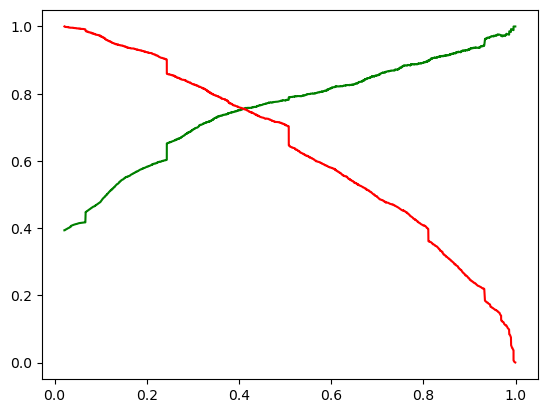

In [442]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- The above graph shows the trade-off between the Precision and Recall .

### Making predictions on the test set

In [443]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [444]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
3271,-0.600595,0,1,0,0,0,0,0,0,0,0,0,0
1490,1.887326,1,0,0,0,0,0,1,0,0,0,0,0
7936,-0.752879,0,1,0,0,0,0,0,0,0,0,0,0
4216,-0.888650,0,0,0,0,0,1,0,0,0,0,0,0
3830,-0.587751,0,0,1,0,0,0,0,0,0,0,0,0


In [445]:
X_test_sm = sm.add_constant(X_test)

In [446]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.130582
1490    0.965036
7936    0.112310
4216    0.810675
3830    0.110651
1800    0.677129
6507    0.312597
4821    0.230861
4223    0.932143
4714    0.508009
dtype: float64

In [447]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [448]:
# Let's see the head
y_pred_1.head()

,0
3271,0.130582
1490,0.965036
7936,0.112310
4216,0.810675
3830,0.110651


In [449]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [455]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [456]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [457]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [458]:
y_pred_final.head()

,Converted,CustID,Prospect ID,0
0,0,3271,0,0.130582
1,1,1490,1,0.965036
2,0,7936,2,0.112310
3,1,4216,3,0.810675
4,0,3830,4,0.110651


In [459]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [460]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [461]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,0,0,0.130582
1,1,1,0.965036
2,2,0,0.112310
3,3,1,0.810675
4,4,0,0.110651


In [462]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [463]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,0,0,0.130582,0
1,1,1,0.965036,1
2,2,0,0.112310,0
3,3,1,0.810675,1
4,4,0,0.110651,0


### Model Evaluation

In [464]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8024237972824091


In [465]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1403,  331],
       [ 207,  782]], dtype=int64)

In [466]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [467]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7906976744186046


In [468]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8091118800461361


### Assigning Lead Score to Testing Data

In [469]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,0,0,0.130582,0,13
1,1,1,0.965036,1,97
2,2,0,0.112310,0,11
3,3,1,0.810675,1,81
4,4,0,0.110651,0,11


## Results :

**1) Comparing the values of Train and Test Set**

Train Data:
- **Accuracy : 81.05 %**
- **Sensitivity : 80.08 %**
- **Specificity : 80.53 %**

Test Data:
- **Accuracy : 80.24 %**
- **Sensitivity : 79.06 %**
- **Specificity : 80.91 %**

#### 2) Determining hot leads with more than 80% Conversion Rate


In [472]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1,1,0.965036,1,97
3,3,1,0.810675,1,81
8,8,1,0.932143,1,93
21,21,1,0.990014,1,99
23,23,1,0.995610,1,100
...,...,...,...,...,...
2694,2694,1,0.958845,1,96
2699,2699,1,0.877064,1,88
2703,2703,1,0.863788,1,86
2715,2715,1,0.840358,1,84


- There are 422 leads which are having high chances of getting converted ( conversion rate >80%)

#### 3) Finding out the important features from our final model (Feature Importance):

In [474]:
res.params.sort_values(ascending=False)

What is your current occupation_Working Professional    2.803836
Lead Origin_Lead Add Form                               2.588049
Last Activity_Had a Phone Conversation                  2.580424
Lead Source_Welingak Website                            1.976479
Last Activity_SMS Sent                                  1.165683
Total Time Spent on Website                             1.126454
const                                                  -0.132620
Lead Source_Google                                     -1.086658
Last Activity_Converted to Lead                        -1.230516
Lead Source_Organic Search                             -1.289410
Lead Source_Direct Traffic                             -1.479342
Last Activity_Olark Chat Conversation                  -1.503057
Lead Source_Referral Sites                             -1.516799
Last Activity_Email Bounced                            -2.180536
dtype: float64

## Recommendations

- The company should contact the leads who are "working professionals" as they are more likely to get converted.
- The company should contact leads where the lead origin is 'Lead Add Form' as they are more likely to get converted.
- The company should contact leads whose last Activity was 'Phone Conversation' or 'SMS Sent'they are more likely to get converted.
- The company should contact leads coming from the lead sources 'Welingak Website' they are more likely to get converted.
- The company should not contact leads coming from lead_sources 'Google' , 'Organic Search' , 'Direct Traffic','Referral Sites' as they are not likely to get converted.
- The company should not contact leads who have Last_Activity 'Converted to Lead' , 'Olark Chat Conversation','Email Bounced' as they are not likely to get converted.